# <span style=color:darkblue>Introduction to Linear Regression</span>

<span style=color:blue><b>Simple or single-variate linear regression</b></span> is the simplest case of linear regression with a single independent variable, $\:x\:$.

<div class="alert alert-block alert-warning"><b><u>Linear regression</u></b>   
$%$   

<span style=color:blue><b><u>Linear regression</u></b></span> assumes that the relationship <b>between two variables</b>, <span style=color:blue>$\:x\:$</span> and <span style=color:blue>$\:y\:$</span>, can be modeled by a <b>straight line</b> :   
$%$   
\begin{align*}y\:=\:\beta_0\:+\:\beta_1x\:+\:\epsilon\end{align*}   
$%$   
where $\:\beta_0\:$ and $\:\beta_1\:$ represent <i>two model parameters</i>, the <b><u>regression coefficients</u></b> ($\:\beta\:$ is the Greek letter $beta$). These <b>parameters</b> are estimated using data, and we write their <span style=color:blue>point estimates</span> as <span style=color:blue>$b_0\:$</span> and <span style=color:blue>$b_1\:$</span> and $\:\epsilon\:$ is the <b><u>random error</u></b>.   
$%$   
When we use <span style=color:blue>$\:x\:$</span> (<b>input</b> data) to predict <span style=color:blue>$\:y\:$</span> (<b>outputs</b>), we can call <span style=color:blue>$\:x\:$</span> the <b>explanatory</b>, <b>predictor</b> or <b>independent</b> variable, and we call <span style=color:blue>$\:y\:$</span> the <b>response</b> or <b>dependent</b> variable.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\dataBCN\\OneDrive - NETMIND\\Empreses\\Crash Courses\\DS Crash Course\\Naturgy\\Module III\\data\\2008.csv",nrows = 10000)

df = df.dropna(subset = ["ArrDelay"]) # Elimiar NAs basándose en columnas de interés


plt.scatter(df.DepDelay,df.ArrDelay,color = "black")
plt.show()

<Figure size 640x480 with 1 Axes>

<div class="alert alert-block alert-warning"><u><b>Correlation :</b> strength of a linear relationship</u>   
$%$   

<b>Correlation</b>, which always takes values <b>between -1 and 1</b>, describes the <b>strength</b> of the <b>linear relationship</b> between <b>two variables</b>. We denote the <b>correlation</b> by $\:R\:$.   
$%$   

Only when the <b><i>relationship is perfectly linear</i></b> is the <b>correlation</b> either <b>-1</b> or <b>1</b>.   

- If the relationship is <b>strong</b> and <b>positive</b>, the <b>correlation</b> will be <b>near +1.</b>   
- If it is <b>strong</b> and <b>negative</b>, it will be <b>near -1</b>.   
- If there is <b><u>no apparent linear relationship</u></b> between the <b>variables</b>, then the <b>correlation</b> will be <b>near zero</b>.
</div>

In [2]:
np.corrcoef(df.DepDelay,df.ArrDelay)

array([[1.        , 0.95453694],
       [0.95453694, 1.        ]])

## <span style=color:darkgreen>Fitting a line by least squares regression</span>

Scatterplots were introduced as a graphical technique to present two numerical variables simultaneously. Such plots permit the relationship between the variables to be examined with ease.   

Straight lines should only be used when the data appear to have a linear relationship.

### <span style=color:darkred>An objective measure for finding the best line</span>

<div class="alert alert-block alert-warning"><u><b>What do we mean by “Best” ?</b></u>   
$%$   .   

Mathematically, we want a <b>line that has small residuals</b>. We could apply a <b>criteria</b> that could <b><u>minimize</u></b> the <b><u>Sum of the Residual (SR)</u></b> magnitudes :   
$%$   
\begin{align*}SR\:=\:e_1 + e_2 + · · · + e_n\end{align*}   
$%$   
However, a more common practice is to choose the <b>line that minimizes</b> the <b><u>Sum of the Squared Residuals (SSR)</u></b>:   
$%$  
\begin{align*}SSR\:=\:e^{2}_1 + e^{2}_2 + · · · + e^{2}_n\end{align*}
</div>

### <span style=color:darkred>Conditions for the least squares line</span>

When fitting a least squares line, we generally require :    

- <span style=color:blue><b><u>Linearity</u></b></span>. The data should show a <span style=color:blue>linear trend</span>. If there is a nonlinear trend, an advanced regression method should be applied.   
$%$   
- <span style=color:blue><b><u>Nearly normal residuals</u></b></span>. Generally the <span style=color:blue>residuals must be nearly normal</span>. When this condition is found to be unreasonable, it is usually because of <b>outliers</b> or concerns about <b>influential points</b>.   
$%$   
- <span style=color:blue><b><u>Constant variability</u></b></span>. The <b>variability of points</b> around the <span style=color:blue>least squares line</span> remains roughly <b>constant</b>.   
$%$   
- <span style=color:blue><b><u>Independent observations</u></b></span>. Be cautious about applying regression to time series data, which are sequential observations in time such as a stock price each day. Such data may have an underlying structure that should be considered in a model and analysis.

### <span style=color:darkred>Finding the least squares line</span>

<div class="alert alert-block alert-warning">
<b>Parameters</b> are <b>estimated</b> using <b>observed data</b>. we can also find the <b>parameter estimates</b> by applying <u>two properties</u> of the <b>least squares line</b>:   

- The <b><u>slope</u> of the least squares line</b> can be estimated by :   
$%$   
\begin{align*}b_1 = \frac{s_y}{s_x}R\end{align*}   
$%$   
where <b>$\:R\:$</b> is the <span style=color:blue>correlation</span> between the <b>two variables</b>, and $\:s_x\:$ and $\:s_y\:$ are the <span style=color:blue>sample standard deviations</span> of the <b>explanatory variable</b> and <b>response</b>, respectively.   
$%$   

- If <span style=color:blue>$\:\hat{x}\:$</span> is the <span style=color:blue><b>mean of the horizontal variable</b></span> (from the data) and <span style=color:blue>$\:\bar{y}\:$</span> is the <span style=color:blue><b>mean of the vertical variable</b></span> then the point <span style=color:blue>($\bar{x},\:\bar{y}$)</span> is on the <span style=color:blue>least squares line</span>.   
$%$   
We use <span style=color:blue>$\:b_0\:$</span> and <span style=color:blue>$\:b_1\:$</span> to represent the <span style=color:blue><b>point estimates</b> of the parameters</span> <span style=color:blue>$\:\beta_0\:$</span> and <span style=color:blue>$\:\beta_1\:$</span>.

In [3]:
Y = df["ArrDelay"]
X = df[["DepDelay"]]

regr = linear_model.LinearRegression()
regr.fit(X, Y)
Y_pred = regr.predict(X)

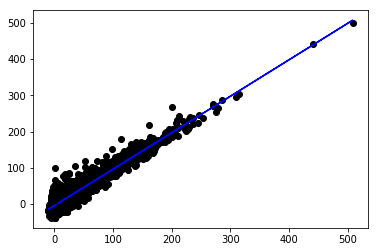

In [4]:
plt.scatter(X,Y,color = "black")
plt.plot(X,Y_pred,color="Blue")
plt.show()

We <span style=color:blue>evaluated the strength of the linear relationship between two variables</span> earlier using the <span style=color:blue><u><b>correlation</b>, $\:R\:$</u></span>.   
$%$   
However, it is more common to explain the <span style=color:blue><u><b>strength of a linear fit</b></u></span> using <span style=color:blue>$\:R^2\:$, called <b>R-squared</b></span>. If provided with a linear model, we might like to describe how closely the data cluster around the linear fit.   
$%$   
The <span style=color:blue>$\:R^2\:$</span> of a <b>linear model</b> describes the <span style=color:blue>amount of variation in the response</span> that is <b>explained</b> by the <span style=color:blue>least squares line</span>.    
$%$   


In [5]:
print("R cuadrado: ",r2_score(Y, Y_pred))

R cuadrado:  0.911140771253595


It is the same that the square of the correlation

In [6]:
np.corrcoef(df.DepDelay,df.ArrDelay)[0,1] ** 2

0.9111407712535954

<div class="alert alert-block alert-warning"><b><u>Residuals</u></b>   
$%$   

<span style=color:blue><b><u>Residuals</u></b></span> are the <b>leftover variation</b> in the data <b>after</b> accounting for the <b>model fit</b>:   
$%$   
\begin{align*}Data\:=\:Fit\:+\:Residual\end{align*}   
$%$   
Each <b>observation</b> will have a <b>residual</b>.   

- If an <b>observation</b> is above the regression line, then its <b>residual</b>, the <i>vertical distance</i> from the <b>observation</b> to the <b>line</b>, is <u>positive</u>.   
$%$   
- <b>Observations</b> below the <b>line</b> have <b>negative residuals</b>.   
$%$   
One goal in picking the right linear model is for these <b>residuals</b> to be <i><b>as small as</b> possible</i>.   
$%$   
<b><u>Difference between Observed and Expected</u></b>   
$%$      
The <b>residual</b> of the $\:i^{th}\:$ <b>observation</b> ($\:x_i\:,\:y_i\:$) is the <b>difference</b> of the <b><u>observed response</u></b> ($\:y_i\:$) and the <b><u>response</u></b> we would <b>predict</b> based on the <b><u>model fit</u></b> ($\:\hat{y}_{i}\:$) :   

\begin{align*}e_i\:=\:y_i\:−\:\hat{y}_{i}\end{align*}   
$%$   
We typically <b>identify $\:\hat{y}_{i}\:$ by plugging $\:x_i\:$ <u>into the model</u></b>.
</div>

<b>Residuals</b> are helpful in <b>evaluating</b> how well a <span style=color.blue>linear model fits</span> a dataset. We often display them in a <span style=color:blue><b>residual plot</b></span>.   

One purpose of residual plots is to identify characteristics or patterns still apparent in data after fitting a model.

### A more advanced approach

In [7]:
import statsmodels.formula.api as smf

data = {"x" : X, "y" : Y}

model = smf.ols('y ~ x', data=data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.006e+05
Date:                Fri, 13 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:48:29   Log-Likelihood:                -36842.
No. Observations:                9811   AIC:                         7.369e+04
Df Residuals:                    9809   BIC:                         7.370e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.4518      0.124    -35.902      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


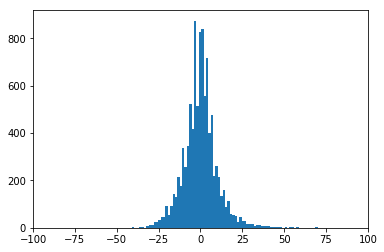

Mean: -0.0


In [8]:
errors = Y - Y_pred

plt.hist(errors,bins = 100)
plt.xlim([-100,100])
plt.show()

print("Mean:",round(np.mean(errors),4))

## Final Exercises:

1. Define a matrix of correlations to identify interesting variables

2. Try to adjust a model using other variables of the 2008.csv dataset, for example using AirTime, Distance, one of the Delays... up to you!

3. Try to find a pair of variables where the slope of the regression model is not significant (could be 0). Would be interesting to solve this problem using a loop

4. We don't know yet how to deal with categorical variables as predictors... explore what are the dummy variables, because we are going to need it!

